<a href="https://colab.research.google.com/github/Harikaraja/News_headline_Generation-using-NLP/blob/main/Data_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import graphviz

In [18]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)


True

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/BBC_08_APR_17_to_08_JUN_2017.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv(path)

In [4]:
print(df)

                                               article  \
0    Syria war: US warns of 'more' after missile st...   
1    Stockholm lorry rams crowds, killing 'at least...   
2    DR Congo: Bruno Tshibala appointed new prime m...   
3    Norway to build landmark ship tunnel Norway is...   
4    Trump to make China visit after hosting Xi for...   
..                                                 ...   
983  Uber 'obtained rape victim's medical records' ...   
984  London attack: Family pays tribute to 'beautif...   
985  Mozambique police warn bald men after ritual a...   
986  Burmese military plane vanishes over Andaman S...   
987  Oldest female wing-walker beats record A darin...   

                       date panda_date  \
0    Saturday 08 April 2017   8-Apr-17   
1    Saturday 08 April 2017   8-Apr-17   
2    Saturday 08 April 2017   8-Apr-17   
3    Saturday 08 April 2017   8-Apr-17   
4    Saturday 08 April 2017   8-Apr-17   
..                      ...        ...   
983   Thu

In [5]:
print(df["article"])

0      Syria war: US warns of 'more' after missile st...
1      Stockholm lorry rams crowds, killing 'at least...
2      DR Congo: Bruno Tshibala appointed new prime m...
3      Norway to build landmark ship tunnel Norway is...
4      Trump to make China visit after hosting Xi for...
                             ...                        
983    Uber 'obtained rape victim's medical records' ...
984    London attack: Family pays tribute to 'beautif...
985    Mozambique police warn bald men after ritual a...
986    Burmese military plane vanishes over Andaman S...
987    Oldest female wing-walker beats record A darin...
Name: article, Length: 988, dtype: object


In [6]:
print(df["headline"])

0          US warns Syria it's ready for 'more'
1            Deaths as lorry rams Swedish store
2         New PM Tshibala appointed in DR Congo
3          Norway to build landmark ship tunnel
4               Trump to make China state visit
                         ...                   
983       Uber 'obtained rape victim's records'
984    Family's tribute to London attack victim
985    Police warn bald men after ritual attack
986             Burmese military plane vanishes
987      Oldest female wing-walker beats record
Name: headline, Length: 988, dtype: object


In [7]:
print(len(df))

988


In [8]:
articles = list(df["article"])

Sentence Lowering

In [36]:
lowercased_li = [sentence.lower() for sentence in articles]
print(len(lowercased_li))

988


**Removing remove non-word and non-whitespace characters**

In [37]:
import re

# Your list
rnw=[]

# Function to apply the regex replacement
def apply_regex(text):
    return re.sub(r'[^\w\s]', '', text)

# Apply the function to each element in the list
rnw = [apply_regex(entry) for entry in lowercased_li]
print(len(rnw))

988


**Sentence Tokenization**

In [38]:
from nltk.tokenize import sent_tokenize
tokenized_li = [sent_tokenize(sentence) for sentence in rnw]
print(len(tokenized_li))

988


**Word Tokenization**

In [39]:
from nltk.tokenize import word_tokenize
tokenized_words_li = [[word_tokenize(sentence) for sentence in sentences] for sentences in tokenized_li]
print(len(tokenized_words_li))

988


In [40]:
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Apply stemming on tokenized_words_li
stemmed_li = [
    [
        porter_stemmer.stem(word) for sentence in sentences for word in word_tokenize(sentence)
    ]
    for sentences in tokenized_li
]
print(len(stemmed_li))

988


**Stop Words**

In [31]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [43]:
filtered_li = [
    [
        word for word in words if word not in stop_words
    ] for words in stemmed_li
]

print(len(filtered_li))
print(filtered_li[1])

988
['stockholm', 'lorri', 'ram', 'crowd', 'kill', 'least', 'four', 'peopl', 'lorri', 'ha', 'smash', 'store', 'central', 'stockholm', 'kill', 'least', 'four', 'peopl', 'least', 'dozen', 'peopl', 'also', 'injur', 'incid', 'drottninggatan', 'queen', 'street', 'one', 'citi', 'major', 'pedestrian', 'street', 'friday', 'afternoon', 'swedish', 'prime', 'minist', 'stefan', 'lofven', 'said', 'wa', 'terror', 'attack', 'one', 'man', 'ha', 'arrest', 'polic', 'releas', 'cctv', 'imag', 'person', 'may', 'connect', 'case', 'eyewit', 'describ', 'lorri', 'tri', 'hit', 'peopl', 'speech', 'friday', 'night', 'mr', 'lofven', 'said', 'swedish', 'valu', 'democraci', 'freedom', 'would', 'undermin', 'hatr', 'also', 'announc', 'countri', 'border', 'control', 'strengthen', 'crash', 'happen', 'ahlen', 'depart', 'store', 'befor', '1500', 'local', 'time', '1300', 'gmt', 'wit', 'say', 'lorri', 'drove', 'front', 'window', 'one', 'eyewit', 'annevi', 'petersson', 'told', 'bbc', 'wa', 'shop', 'fit', 'room', 'heard', 'sc

In [45]:
data = []
dataset_len = len(df)
for i in range(0,dataset_len):
  li=[]
  art_len = filtered_li[i]
  head_len = df["headline"][i]
  li.append(len(art_len))
  li.append(len(head_len.split()))
  data.append(li)
vis_dataset = pd.DataFrame(data, columns=['numwords_in_article', 'headline_length'])
print(vis_dataset)

     numwords_in_article  headline_length
0                    546                7
1                    266                6
2                    142                7
3                     20                6
4                    373                6
..                   ...              ...
983                  253                5
984                  393                6
985                  150                7
986                  143                4
987                   48                5

[988 rows x 2 columns]


In [9]:
#print(articles[80])
words = articles[0].split()
print(len(words))

880


In [10]:
less_than_250=[]
words_251_to_500=[]
words_501_to_800=[]
more_than_800=[]

In [20]:
def classify_article(word_count,article_text):
    if word_count < 250:
      less_than_250.append(article_text)
    elif 251<=word_count<=500:
      words_251_to_500.append(article_text)
    elif 501<=word_count<=800:
      words_501_to_800.append(article_text)
    elif word_count>=801:
      more_than_800.append(article_text)

def count_words(text):
    words = text.split()
    return len(words)

for article_text in articles:
    word_count = count_words(article_text)
    classification = classify_article(word_count,article_text)


In [12]:
print(len(less_than_250))

224


In [13]:
print(len(words_251_to_500))

420


In [14]:
print(len(words_501_to_800))

251


In [15]:
print(len(more_than_800))

93


Dataframe creation

In [16]:
data = []
dataset_len = len(df)
for i in range(0,dataset_len):
  li=[]
  art_len = df["article"][i]
  head_len = df["headline"][i]
  li.append(len(art_len.split()))
  li.append(len(head_len.split()))
  data.append(li)
vis_dataset = pd.DataFrame(data, columns=['numwords_in_article', 'headline_length'])
print(vis_dataset)

     numwords_in_article  headline_length
0                    880                7
1                    430                6
2                    226                7
3                     29                6
4                    604                6
..                   ...              ...
983                  418                5
984                  634                6
985                  243                7
986                  227                4
987                   79                5

[988 rows x 2 columns]


In [46]:
x_axis = []
y_axis = []
dataset_len = len(df)
for i in range(0,dataset_len):
  x_axis.append(vis_dataset['numwords_in_article'][i])
  y_axis.append(vis_dataset['headline_length'][i])

#print(len(x_axis))

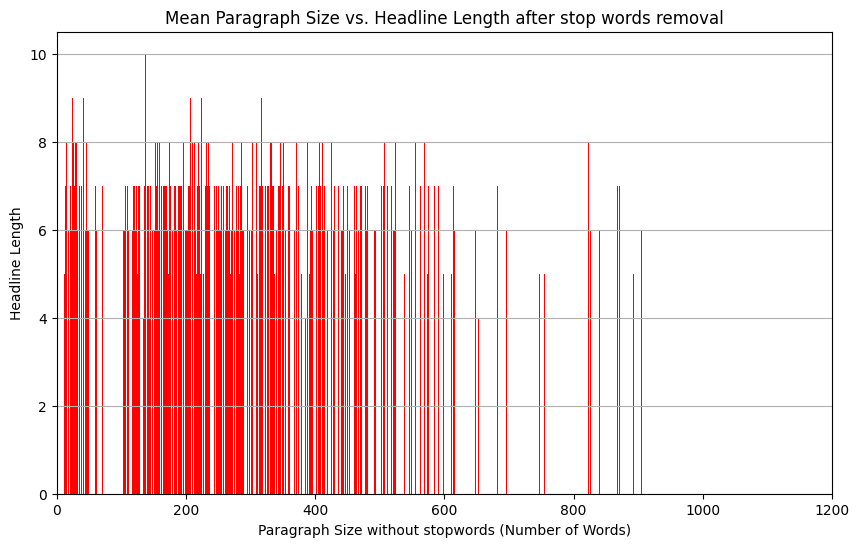

In [49]:
plt.figure(figsize=(10, 6))
plt.bar(x_axis, y_axis, color='red')
plt.title('Mean Paragraph Size vs. Headline Length after stop words removal')
plt.xlabel('Paragraph Size without stopwords (Number of Words)')
plt.ylabel('Headline Length')
plt.grid(axis='y')
plt.xlim(0, 1200)
plt.show()

⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛

Creating x_axis and y_axis  from dataframe

In [17]:
x_axis = []
y_axis = []
dataset_len = len(df)
for i in range(0,dataset_len):
  x_axis.append(vis_dataset['numwords_in_article'][i])
  y_axis.append(vis_dataset['headline_length'][i])

#print(len(x_axis))

***Visualising the data***

Line plot

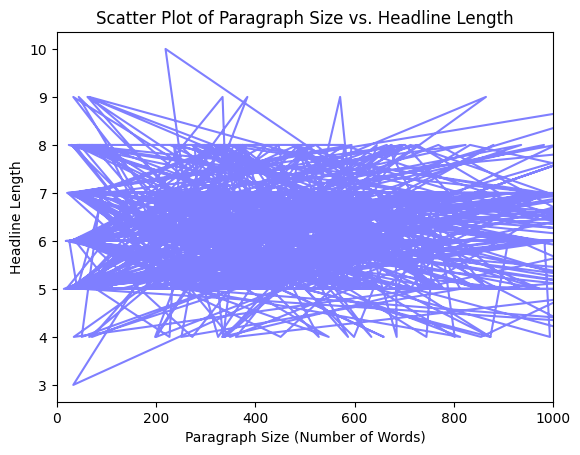

In [ ]:

plt.plot(x_axis, y_axis, color='blue', alpha=0.5)
plt.title('Scatter Plot of Paragraph Size vs. Headline Length')
plt.xlabel('Paragraph Size (Number of Words)')
plt.ylabel('Headline Length')
#plt.grid(True)
plt.xlim(0, 1000)
plt.show()

scatter plot

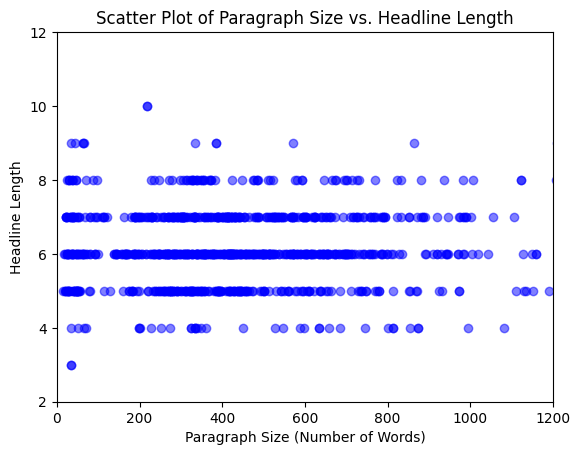

In [ ]:

plt.scatter(x_axis, y_axis, color='blue', alpha=0.5)
plt.title('Scatter Plot of Paragraph Size vs. Headline Length')
plt.xlabel('Paragraph Size (Number of Words)')
plt.ylabel('Headline Length')
#plt.grid(True)
plt.xlim(0, 1200)
plt.yticks([2, 4, 6, 8, 10,12])
plt.show()

Histogram

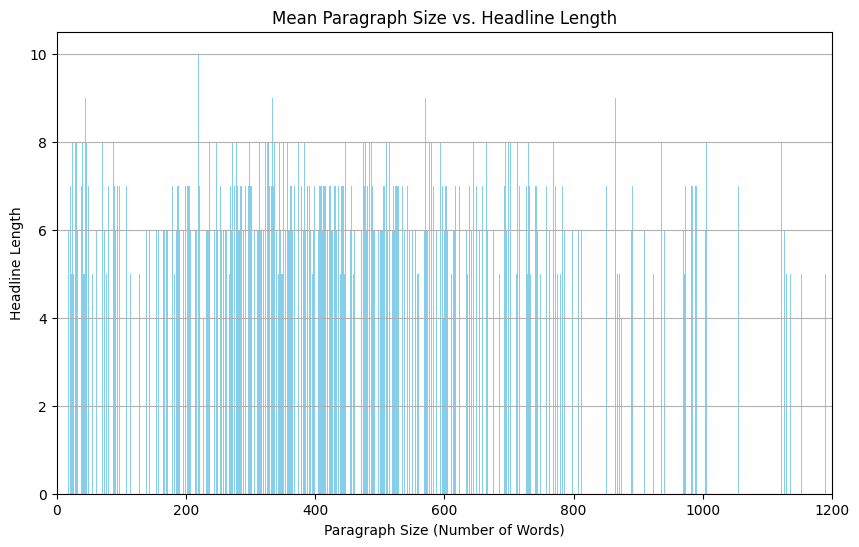

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(x_axis, y_axis, color='skyblue')
plt.title('Mean Paragraph Size vs. Headline Length')
plt.xlabel('Paragraph Size (Number of Words)')
plt.ylabel('Headline Length')
plt.grid(axis='y')
plt.xlim(0, 1200)
plt.show()

In [ ]:
pip install plotly

In [ ]:
pd.options.plotting.backend = "plotly"
import plotly.express as px

In [ ]:
plotly_plot = pd.DataFrame(x_axis,y_axis)
fig = plotly_plot.plot()
fig.show()

In [ ]:
np.corrcoef(x_axis,y_axis)[0,1]

0.023316851296447616